# Handle multiple nodes

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str
    

In [4]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of the graph"""
    state["final"] = f"hi {state['name']}"
    return state


def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequence"""
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state



In [5]:
graph = StateGraph(AgentState)

### creating the graph with the edges between the nodes

In [6]:
graph.add_node("firstnode", first_node)
graph.add_node("secondnode", second_node)

graph.set_entry_point("firstnode")
#add the egde
graph.add_edge("firstnode", "secondnode")

graph.set_finish_point("secondnode")

In [7]:
app = graph.compile()

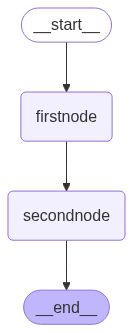

In [9]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png())) 

In [ ]:
result = app.invoke({"name":"charlie", "age":20})
print(result) 

{'name': 'charlie', 'age': 20, 'final': 'hi charlie You are 20 years old!'}
